Preprocessing(tiền xử lý) : là quá trình làm sạch và biến đổi dữ liệu thô trước khi áp dụng các thuật toán học máy hoặc phân tích dữ liệu. 
- Việc tiền xử lý là cần thiết vì dữ liệu thô thường không ở dạng mà các mô hình học máy có thể sử dụng trực tiếp. 
- Các lỗi, sự không nhất quán, giá trị thiếu, và các yếu tố nhiễu khác trong dữ liệu có thể làm giảm hiệu suất của mô hình và dẫn đến các kết quả không chính xác.

### 1. Load and check data

In [402]:
import pandas as pd

file_path = 'D:\WorkSpace_Thinh1\FSS\hmeq.csv'
data = pd.read_csv(file_path)

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [403]:
data.shape

(5960, 13)

In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [405]:
num_cols = data.select_dtypes(include=['float64', 'int64']) 
cat_cols = data.select_dtypes(include=['object']) 

for col in cat_cols:
    print('Values in the {} Column: {}'.format(col,data[col].unique()))
    print('__'*40)

Values in the REASON Column: ['HomeImp' nan 'DebtCon']
________________________________________________________________________________
Values in the JOB Column: ['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
________________________________________________________________________________


### 2. Split data

In [406]:
from sklearn.model_selection import train_test_split

# data_train,data_test = train_test_split(data,test_size=0.1,random_state=0)
data_train = data.copy()

### 3. Train dataset

**3.1 Handling missing data**

In [407]:
data_train.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [408]:
data_train.isnull().sum()/len(data_train)*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

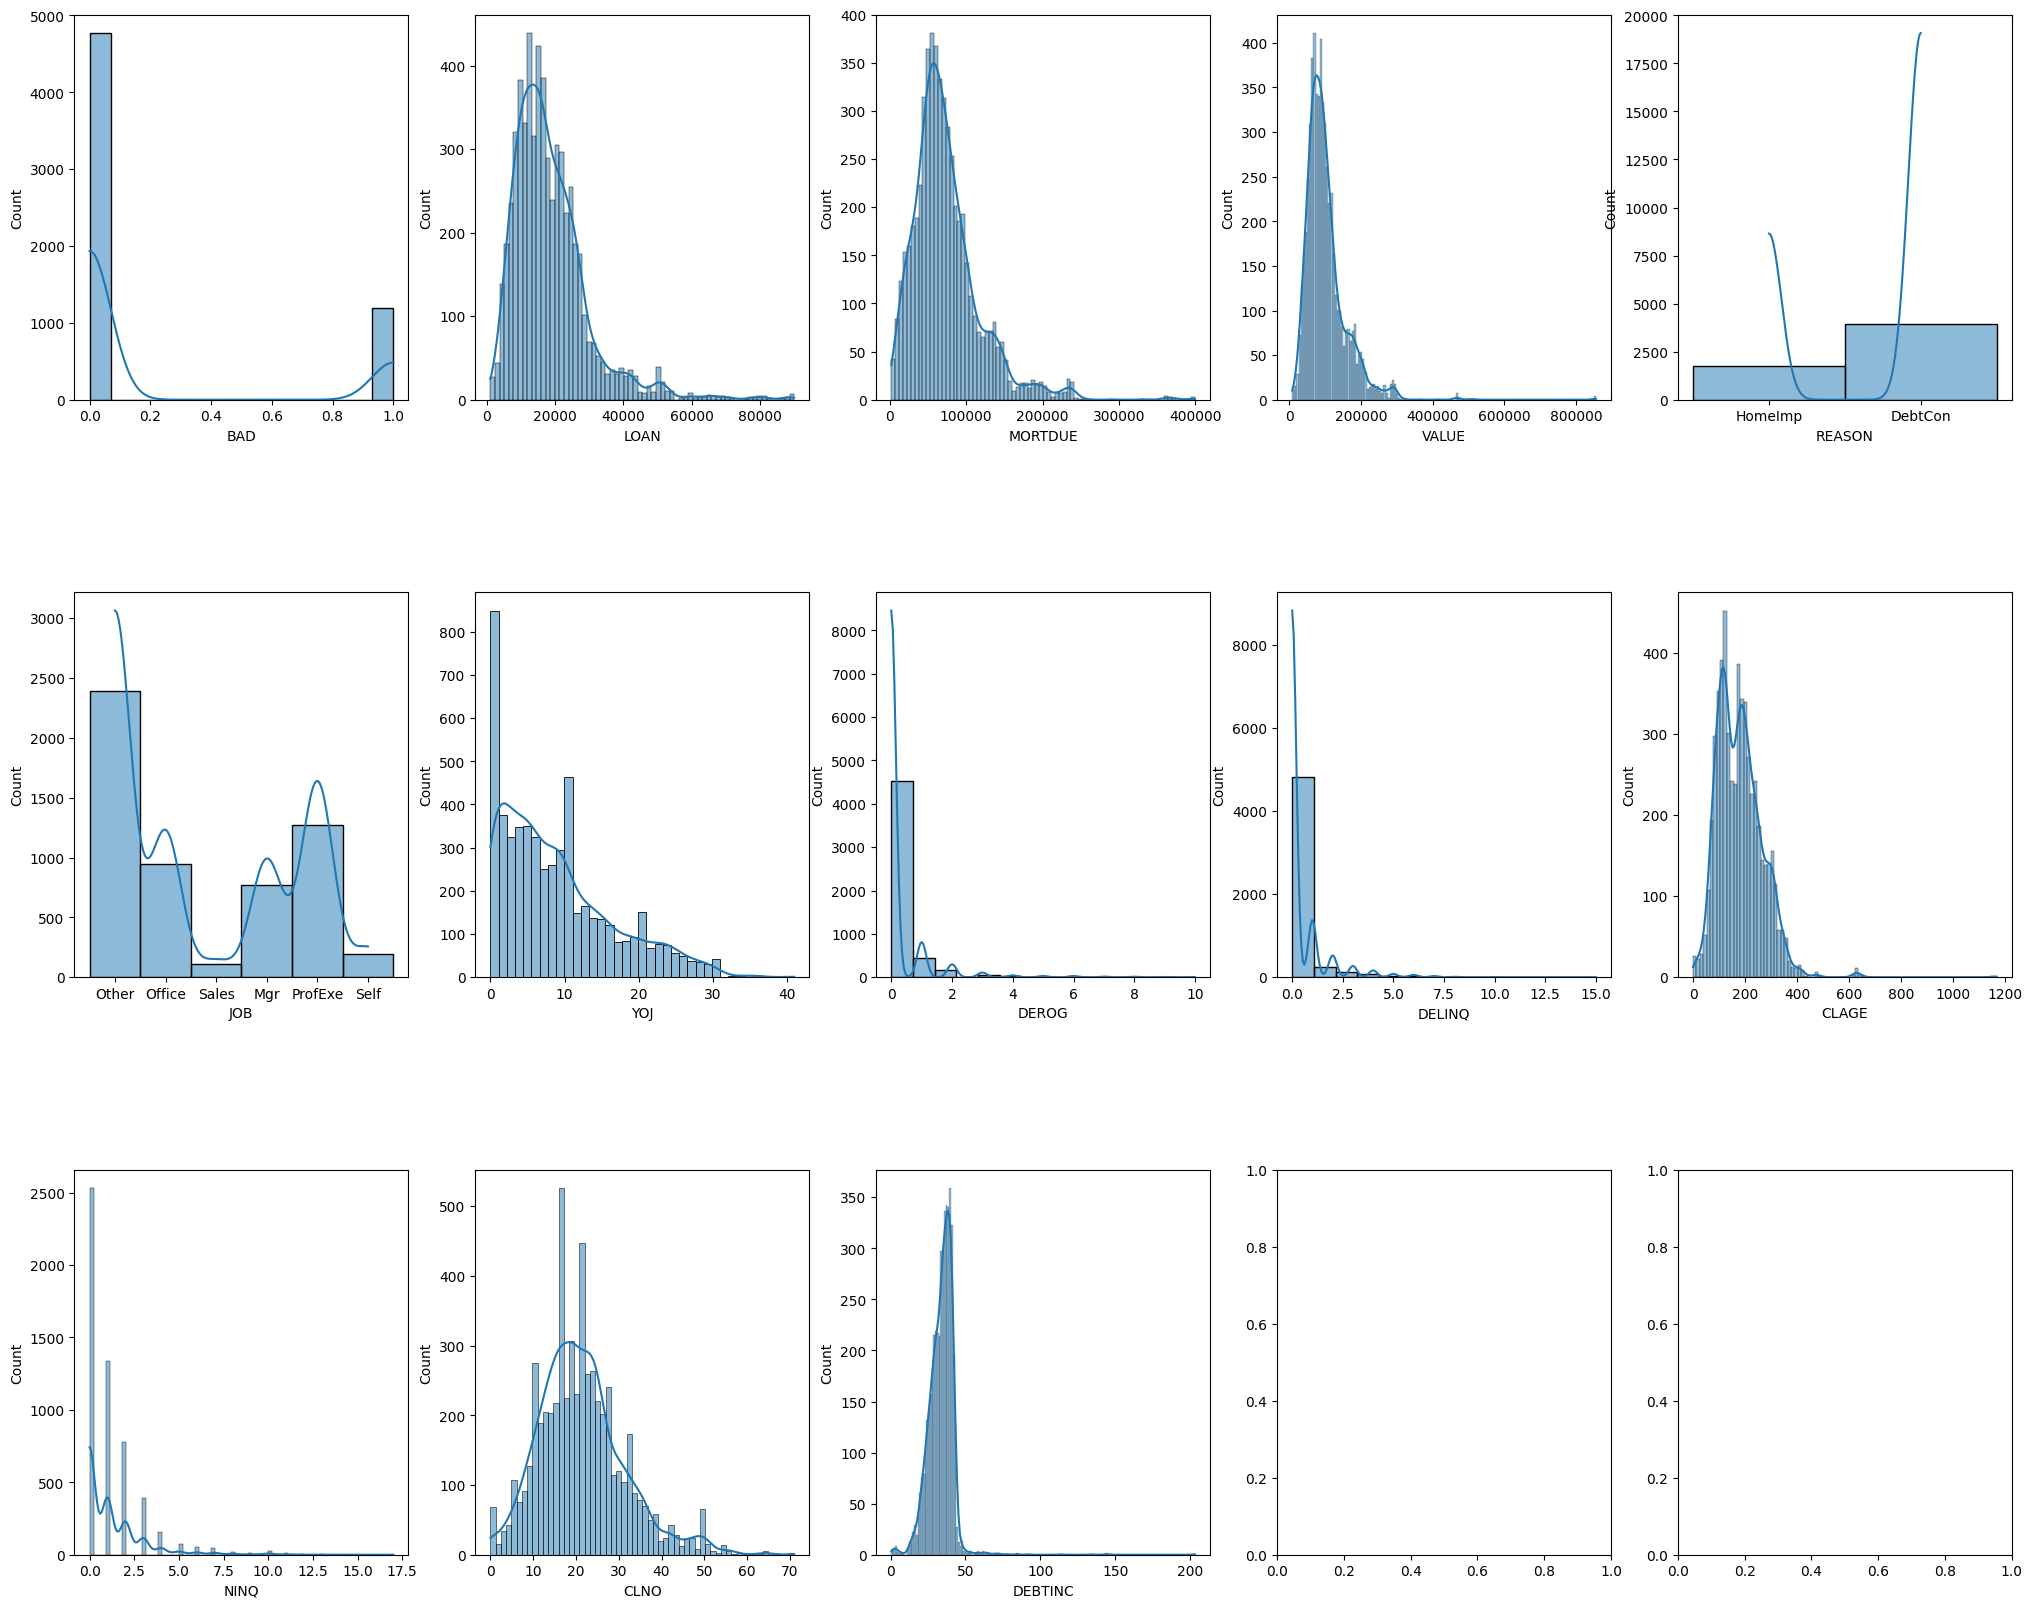

In [409]:
from matplotlib import pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(3, 5, figsize=(25, 20))
for i,ax in zip(data_train.columns,axes.flat):
    sns.histplot(data=data_train,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

***NX: Hầu hết các biến liên tục đều lệch phải -> fill bằng med,mode***

***Fill biến liên tục***

MORTDUE

In [410]:
data_train['MORTDUE'] = data_train['MORTDUE'].fillna(data_train['MORTDUE'].median())

VALUE

In [411]:
data_train['VALUE'] = data_train['VALUE'].fillna(data_train['VALUE'].median())

YOJ

In [412]:
data_train['YOJ'] = data_train['YOJ'].fillna(data_train['YOJ'].median())

CLAGE

In [413]:
data_train['CLAGE'] = data_train['CLAGE'].fillna(data_train['CLAGE'].median())

DEBTINC

In [414]:
data_train['DEBTINC'] = data_train['DEBTINC'].fillna(data_train['DEBTINC'].median())

***Fill biến rời rạc***

DEROG

In [415]:
data_train['DEROG'] = data_train['DEROG'].fillna(data_train['DEROG'].mode()[0])

DELINQ

In [416]:
data_train['DELINQ'] = data_train['DELINQ'].fillna(data_train['DELINQ'].mode()[0])

NINQ

In [417]:
data_train['NINQ'] = data_train['NINQ'].fillna(data_train['NINQ'].mode()[0])

CLNO

In [418]:
data_train['CLNO'] = data_train['CLNO'].fillna(data_train['CLNO'].mode()[0])

***Fill biến phân loại***

- Biến REASON là lí do vay tiền, ở đây có 2 lí do là ghép nợ và mua nhà nên nếu giá trị này được để trống thì khả năng cao sẽ là lí khác. Vì vậy ta sẽ fill thêm 1 giá trị mới là "Other Reason". Như vậy biến REASON sẽ là biến phân loại có 3 giá trị.
- Tương tự với biến JOB, có 6 việc làm được ghi lại trong dataset. Vì vậy nếu được để trống thì khả năng cao sẽ là công việc khác . Mà ở đây đã có trường "Other" nên ta sẽ fill bằng chính giá trị này luôn.

In [419]:
data_train["REASON"] = data_train["REASON"].fillna("Other reason")

In [420]:
data_train['JOB'] = data_train['JOB'].fillna(data_train['JOB'].mode()[0])

In [421]:
data_train = data_train.join(pd.get_dummies(data_train["JOB"]))
data_train = data_train.join(pd.get_dummies(data_train["REASON"]))
data_train.drop(["JOB","REASON"],axis=1,inplace=True)

***Kiểm tra lại phân bố sau khi fill***

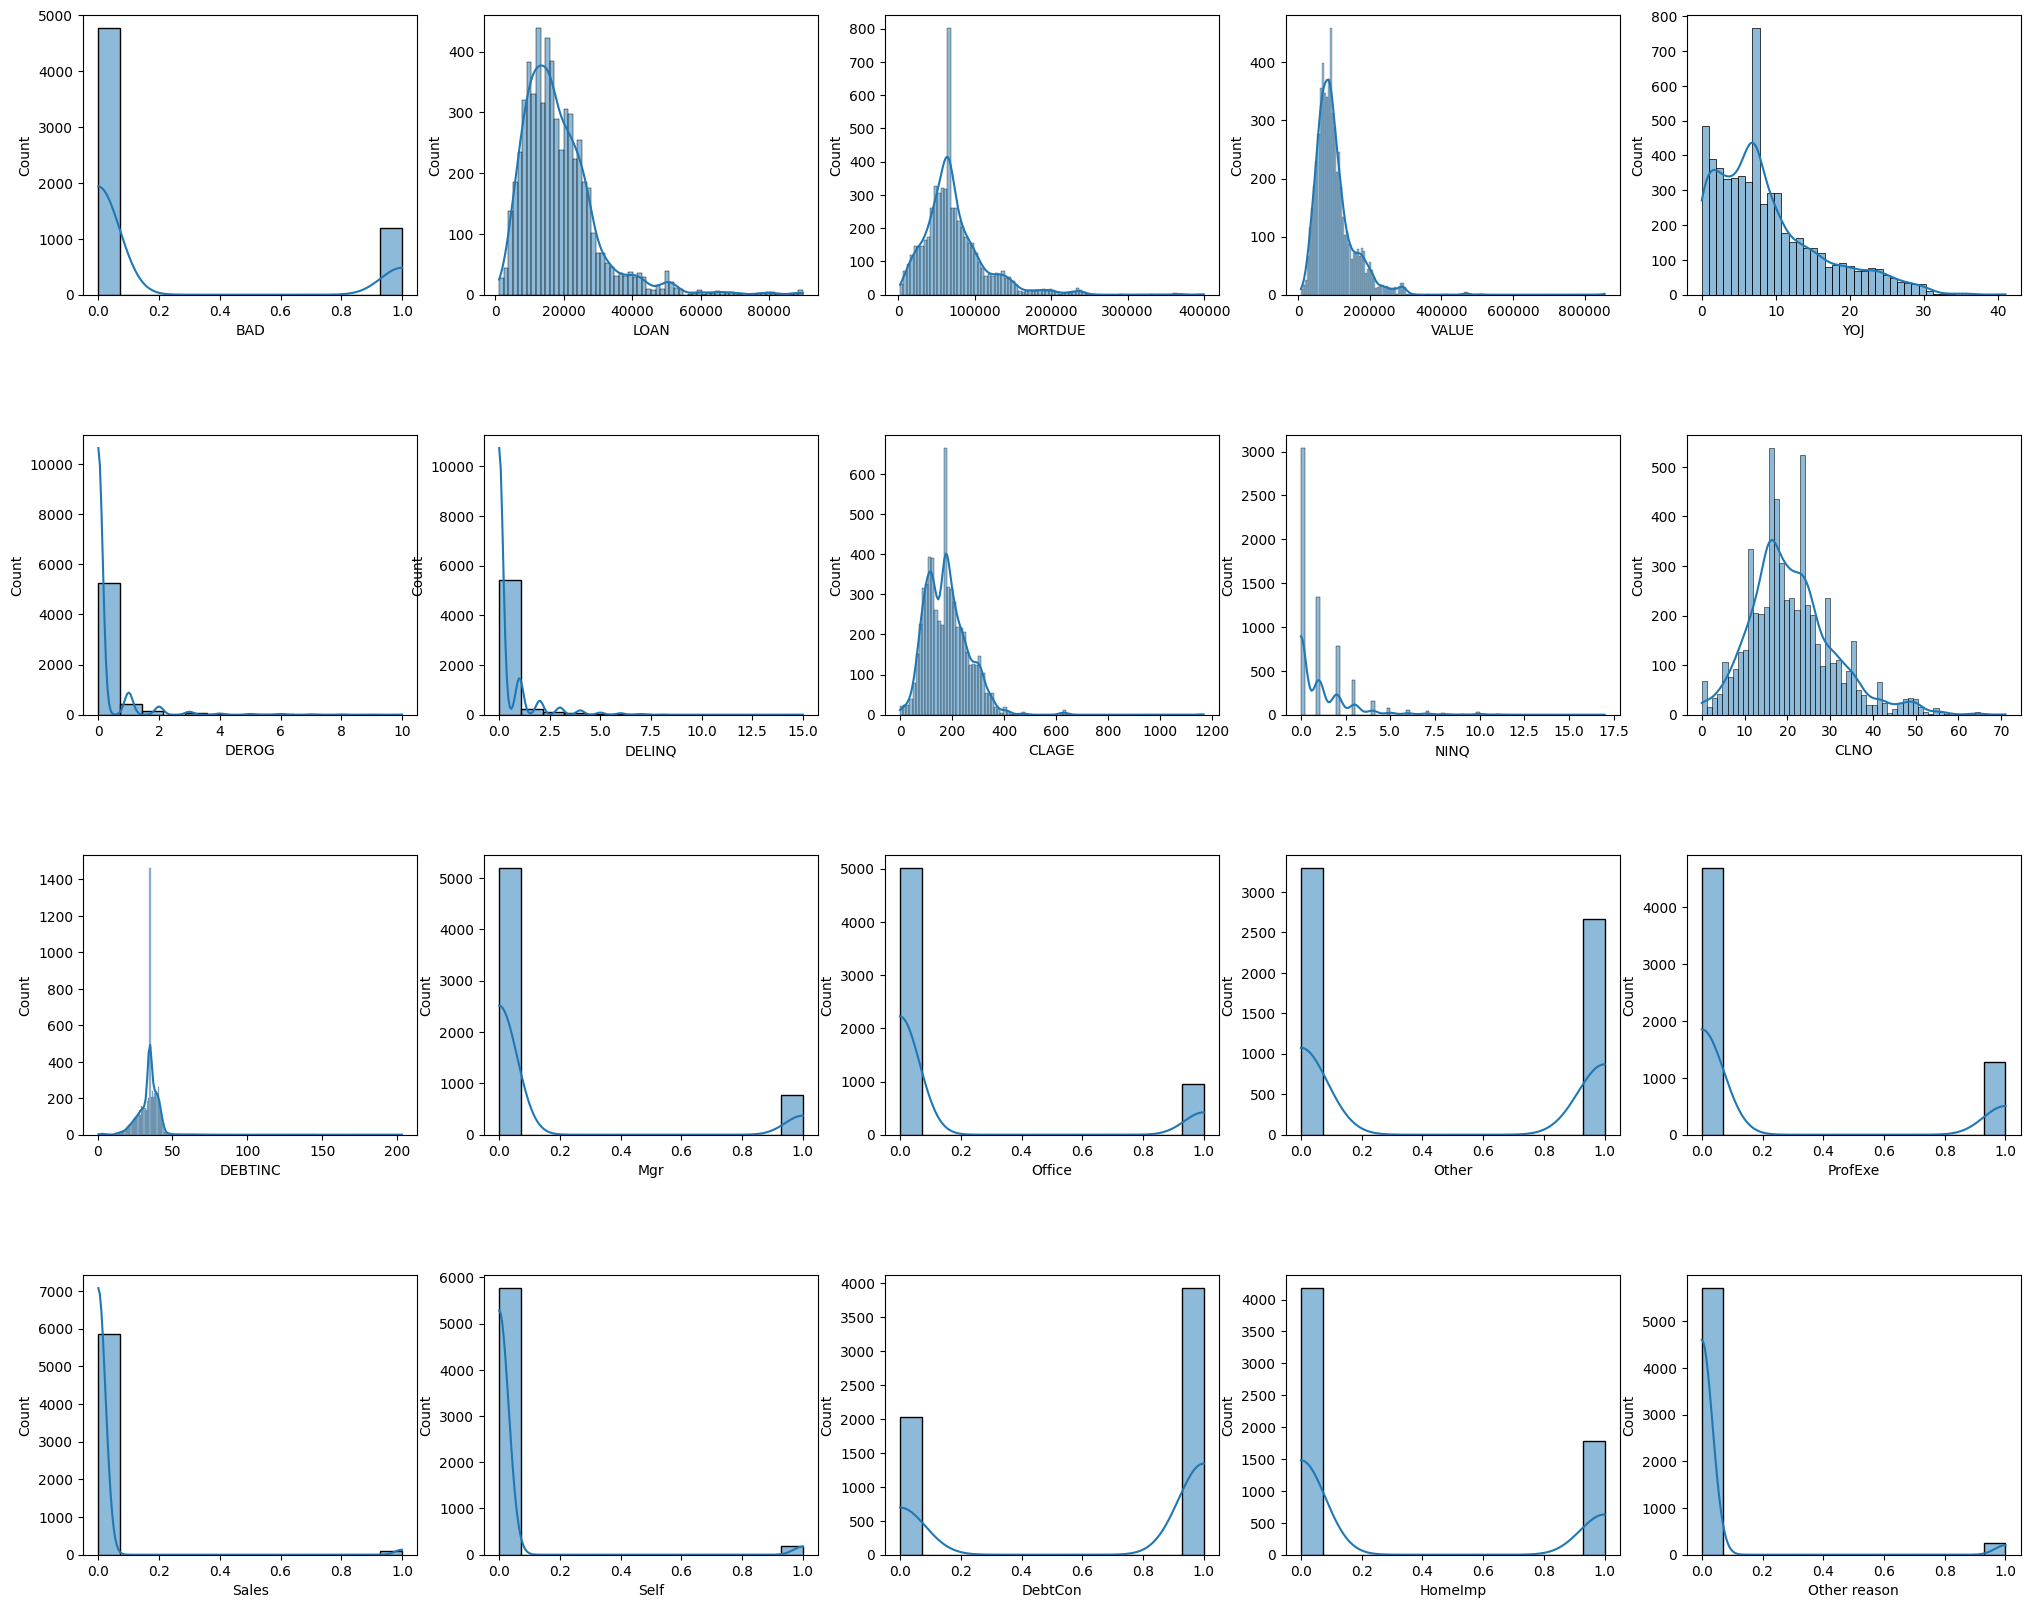

In [422]:
from matplotlib import pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(4, 5, figsize=(25, 20))
for i,ax in zip(data_train.columns,axes.flat):
    sns.histplot(data=data_train,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [423]:
data_train.isnull().sum()

BAD             0
LOAN            0
MORTDUE         0
VALUE           0
YOJ             0
DEROG           0
DELINQ          0
CLAGE           0
NINQ            0
CLNO            0
DEBTINC         0
Mgr             0
Office          0
Other           0
ProfExe         0
Sales           0
Self            0
DebtCon         0
HomeImp         0
Other reason    0
dtype: int64

**3.2 Handling Outliner**

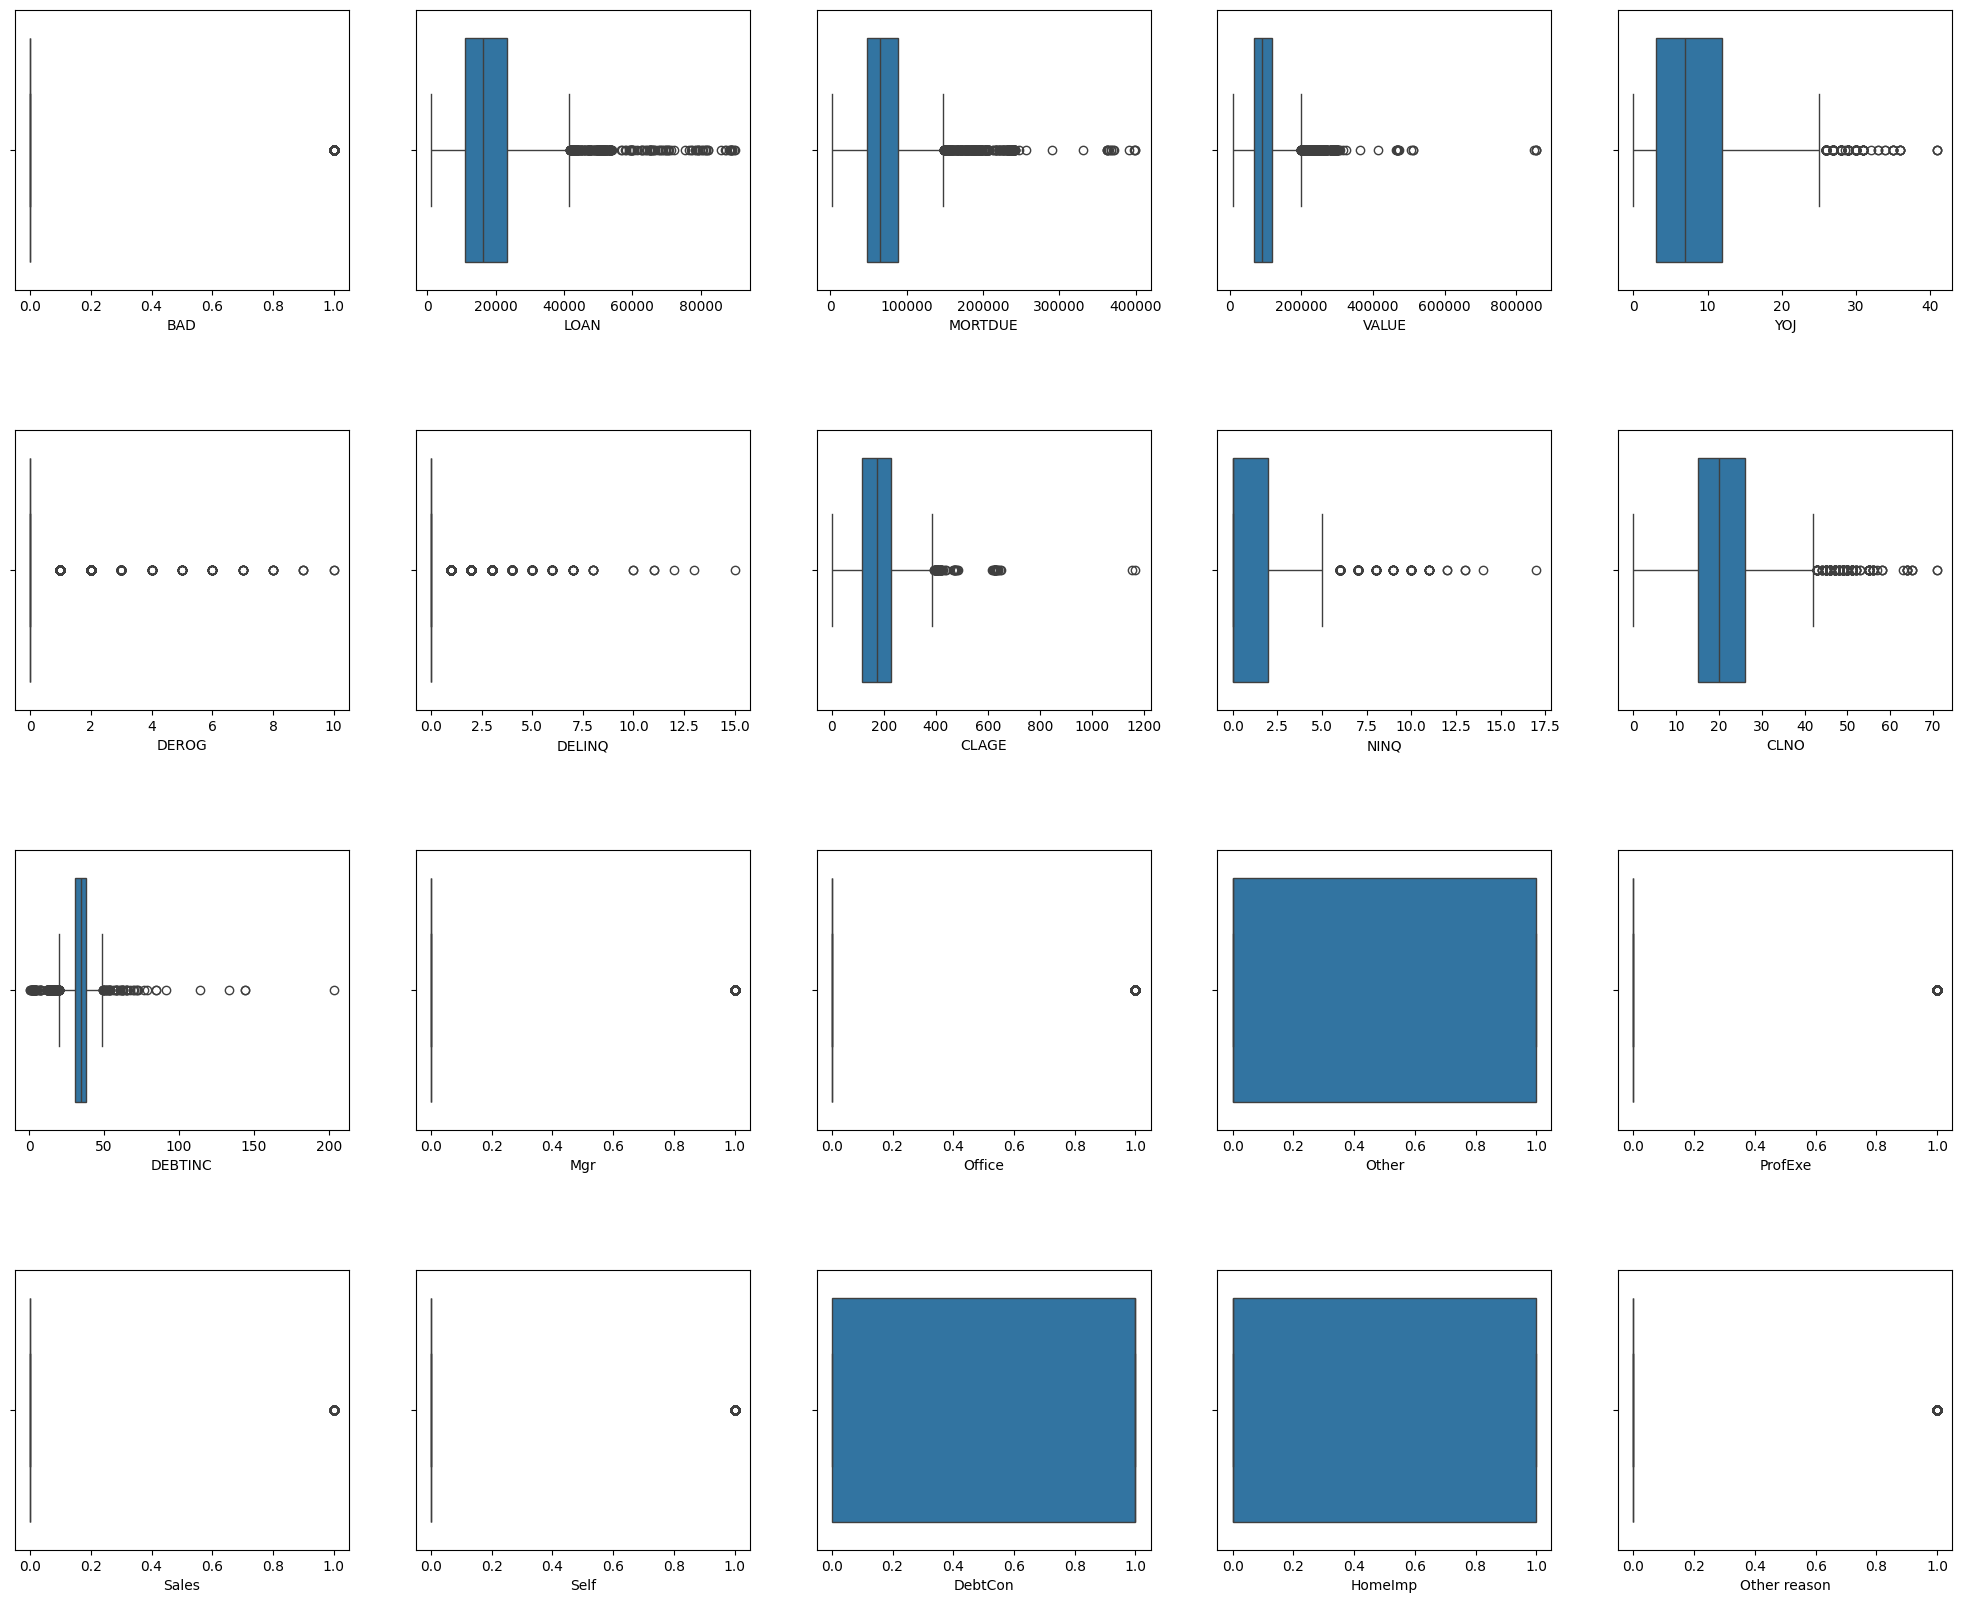

In [424]:
fig, axes = plt.subplots(4, 5, figsize=(25, 20),)
for i,ax in zip(data_train.columns,axes.flat):
    sns.boxplot(data=data_train, x=i,ax=ax)    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

***NX: DEBTINC, LOAN, MORTDUE, VALUE, CLNO có nhiều outliner***

In [425]:
import pandas as pd
import numpy as np

def remove_outlier_IQR(df):
    # Chỉ chọn các cột số
    df_num = df.select_dtypes(include=[np.number])
    
    
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    
    # Lọc các hàng không có giá trị ngoại lai
    df_num_final = df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    # Ghép các cột không phải là số trở lại
    df_final = df.loc[df_num_final.index]
    return df_final

# Giả sử 'data_train' là tên DataFrame của bạn
df3 = remove_outlier_IQR(data_train)
print("Number of outliers removed: ", data_train.shape[0] - df3.shape[0])

print(df3.shape)
data_train.shape


Number of outliers removed:  2961
(2999, 20)


(5960, 20)

***NX: Nếu ta tiến hành xóa bỏ đi các outliner thì dataset gần như sẽ giảm đi 1 nửa. Như vậy sẽ khiến cho dữ liệu có sự thay đổi lớn về phân phối. vì vậy ta chỉ có thể thay thế các giá trị outliner sao cho nó vẫn nằm trong biên***

In [426]:
def replace_outlier_IQR(df):
    df_num = df.select_dtypes(include=[np.number])
    columns_to_exclude = ['DEROG', 'BAD', 'DELINQ', 'NINQ', 'CLNO']
    for col in df_num.columns:
        if col not in columns_to_exclude:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
            df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    return df

# Giả sử 'data_train' là tên DataFrame của bạn
data_train_1 = replace_outlier_IQR(data_train)

In [427]:
data_train_1.shape

(5960, 20)

***Kiểm tra lại boxplot của các biến sau khi đã outliner***

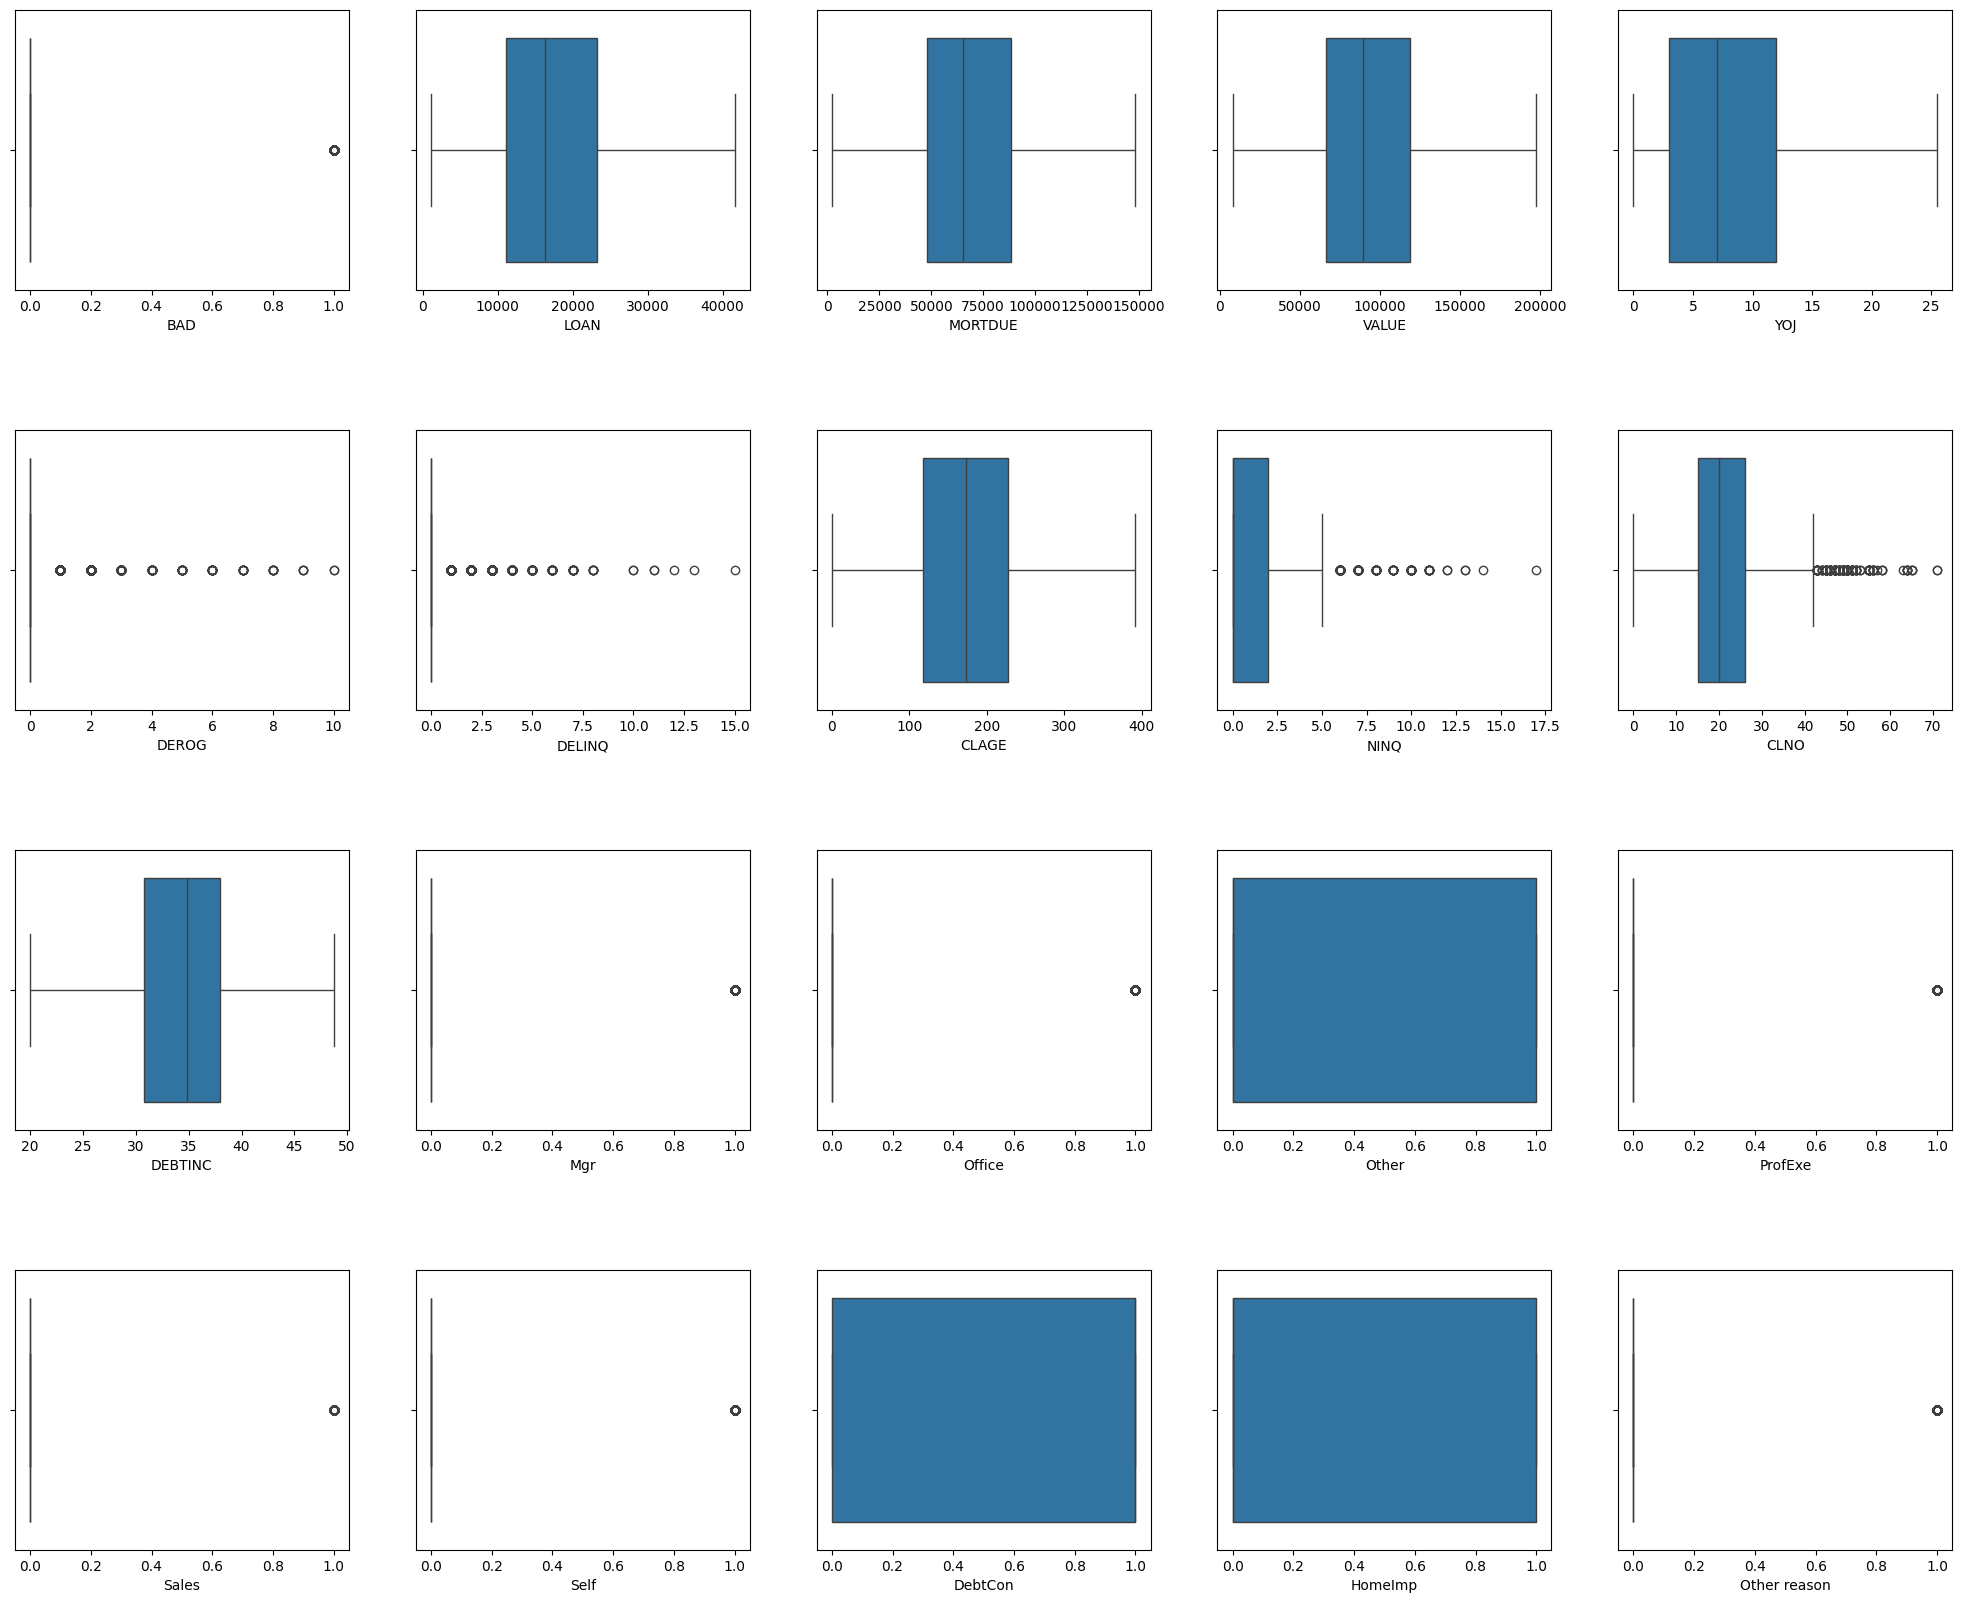

In [428]:
fig, axes = plt.subplots(4, 5, figsize=(25, 20),)
for i,ax in zip(data_train_1.columns,axes.flat):
    sns.boxplot(data=data_train_1, x=i,ax=ax)    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**3.3 Handling imbalanced data**

In [429]:
data_train_1['BAD'].value_counts()

BAD
0    4771
1    1189
Name: count, dtype: int64

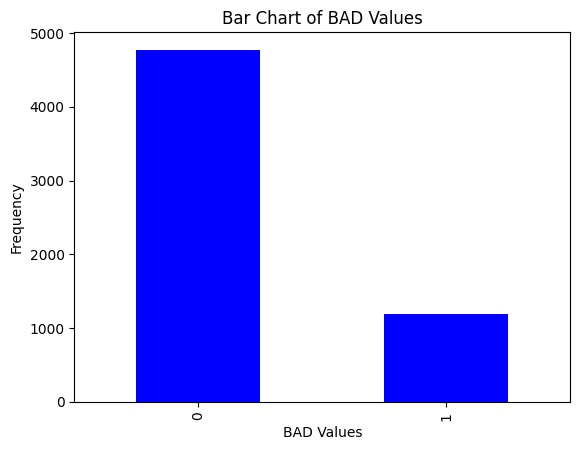

In [430]:
from matplotlib import pyplot as plt

data_train_1['BAD'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('BAD Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of BAD Values')
plt.show()

***NX: Nhận thấy dữ liệu của biến đích đang bị mất cân bằng, ta sẽ sử dụng phương pháp SMOTE để xử lí mất cân bằng***

In [431]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

y_train_1 = data_train_1["BAD"]
X_train_1 = data_train_1.drop(["BAD"], axis=1)

# Kiểm tra biến mục tiêu trước khi SMOTE
print("Before SMOTE:", y_train_1.value_counts())

smt = SMOTE(random_state=42)
X_res, y_res = smt.fit_resample(X_train_1, y_train_1)

# Kiểm tra biến mục tiêu sau khi SMOTE
print("After SMOTE:", pd.Series(y_res).value_counts())


Before SMOTE: BAD
0    4771
1    1189
Name: count, dtype: int64
After SMOTE: BAD
1    4771
0    4771
Name: count, dtype: int64


In [432]:
data_train_2 = pd.concat([pd.DataFrame(X_res, columns=X_train_1.columns), pd.Series(y_res, name="BAD")], axis=1)
data_train_2.head()


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,Sales,Self,DebtCon,HomeImp,Other reason,BAD
0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,False,False,True,False,False,False,False,True,False,1
1,1300.0,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,False,False,True,False,False,False,False,True,False,1
2,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,False,False,True,False,False,False,False,True,False,1
3,1500.0,65019.0,89235.5,7.0,0.0,0.0,173.466667,0.0,16.0,34.818262,False,False,True,False,False,False,False,False,True,1
4,1700.0,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,False,True,False,False,False,False,False,True,False,0


**3.4 Normalization (Scaling)**

In [433]:
from sklearn.preprocessing import StandardScaler

X_res = data_train_2.drop(["BAD"], axis=1)
y_res = data_train_2["BAD"]

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

data_train_3 = pd.concat([pd.DataFrame(X_res_scaled, columns=X_res.columns), y_res.reset_index(drop=True)], axis=1)

data_train_3.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,Sales,Self,DebtCon,HomeImp,Other reason,BAD
0,-1.733950,-1.238737,-1.271155,0.328103,-0.390069,-0.508211,-1.009869,-0.166404,-1.217158,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-0.18294,-0.245402,-1.611423,1.289913,-0.239099,1
1,-1.712767,0.024001,-0.615327,-0.214021,-0.390069,0.946444,-0.632289,-0.727491,-0.713470,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-0.18294,-0.245402,-1.611423,1.289913,-0.239099,1
2,-1.691584,-1.591903,-1.769583,-0.678698,-0.390069,-0.508211,-0.252419,-0.166404,-1.116420,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-0.18294,-0.245402,-1.611423,1.289913,-0.239099,1
3,-1.691584,-0.119837,-0.150153,-0.214021,-0.390069,-0.508211,0.077505,-0.727491,-0.511995,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-0.18294,-0.245402,-1.611423,-0.775246,4.182373,1
4,-1.670401,0.816823,0.358088,-0.833590,-0.390069,-0.508211,-1.024074,-0.727491,-0.713470,0.049068,-0.477884,2.184613,-1.072412,-0.577108,-0.18294,-0.245402,-1.611423,1.289913,-0.239099,0


**3.5 Data Reduction**

***PCA***

In [434]:
X = data_train_3.drop(columns=["BAD"])
y = data_train_3["BAD"]

In [435]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X)

data_train_4 = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
data_train_4["BAD"] = y.values
data_train_4.name = 'Dữ liệu giảm chiều bằng PCA'

# print(pca.explained_variance_ratio_)
explained_variance_ratio = pca.explained_variance_ratio_
information_loss = 1 - np.sum(explained_variance_ratio)
print("Lượng thông tin mất mát: ",information_loss)
data_train_4.head()


Lượng thông tin mất mát:  0.2623489283888949


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,BAD
0,-3.463916,-1.045338,0.372415,-0.453556,-0.479803,-0.057823,0.573658,0.432817,-0.325812,-0.237804,1
1,-2.269962,-1.453033,0.885776,-0.174541,-0.340149,-0.207496,0.625626,0.228596,-0.086573,-0.264291,1
2,-3.719819,-0.969666,0.322937,-0.522468,-0.438076,-0.007884,0.683819,0.152077,-0.104841,-0.277792,1
3,-1.742754,-1.078538,-0.194450,1.640562,-1.287917,0.347855,-1.652735,-0.020520,3.133995,-0.955047,1
4,-0.954457,-2.015648,-0.028652,-2.834488,0.655724,-0.562518,-0.459284,-0.476691,0.777093,-0.894065,0


***Automatic Feature Selection***

In [436]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

select_k_best = SelectKBest(score_func=mutual_info_classif, k=10) 
X_k_best = select_k_best.fit_transform(X, y)

data_train_5 = pd.DataFrame(X_k_best, columns=[X.columns[i] for i in select_k_best.get_support(indices=True)])
data_train_5["BAD"] = y.values
data_train_5.name = 'Dữ liệu giảm chiều bằng SelectKBest'

data_train_5.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
0,-1.733950,-1.238737,-1.271155,0.328103,-0.390069,-0.508211,-1.009869,-0.166404,-1.217158,0.049068,1
1,-1.712767,0.024001,-0.615327,-0.214021,-0.390069,0.946444,-0.632289,-0.727491,-0.713470,0.049068,1
2,-1.691584,-1.591903,-1.769583,-0.678698,-0.390069,-0.508211,-0.252419,-0.166404,-1.116420,0.049068,1
3,-1.691584,-0.119837,-0.150153,-0.214021,-0.390069,-0.508211,0.077505,-0.727491,-0.511995,0.049068,1
4,-1.670401,0.816823,0.358088,-0.833590,-0.390069,-0.508211,-1.024074,-0.727491,-0.713470,0.049068,0


***Manual Feature Selection***

In [437]:
data_train_6 = data_train_3.drop(["HomeImp", "Other reason","Sales", "Self"],axis=1)
data_train_6.name = 'Dữ liệu Feature Selection thủ công'

data_train_6.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,DebtCon,BAD
0,-1.733950,-1.238737,-1.271155,0.328103,-0.390069,-0.508211,-1.009869,-0.166404,-1.217158,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-1.611423,1
1,-1.712767,0.024001,-0.615327,-0.214021,-0.390069,0.946444,-0.632289,-0.727491,-0.713470,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-1.611423,1
2,-1.691584,-1.591903,-1.769583,-0.678698,-0.390069,-0.508211,-0.252419,-0.166404,-1.116420,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-1.611423,1
3,-1.691584,-0.119837,-0.150153,-0.214021,-0.390069,-0.508211,0.077505,-0.727491,-0.511995,0.049068,-0.477884,-0.457747,0.932477,-0.577108,-1.611423,1
4,-1.670401,0.816823,0.358088,-0.833590,-0.390069,-0.508211,-1.024074,-0.727491,-0.713470,0.049068,-0.477884,2.184613,-1.072412,-0.577108,-1.611423,0


***Feature Selection + PCA***

In [438]:
X = data_train_6.drop(columns=["BAD"])
y = data_train_6["BAD"]

In [439]:
pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X)

data_train_7 = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
data_train_7["BAD"] = y.values

data_train_7.name = 'Dữ liệu Feature Selection + PCA'

# print(pca.explained_variance_ratio_)
explained_variance_ratio = pca.explained_variance_ratio_
information_loss = 1 - np.sum(explained_variance_ratio)
print("Lượng thông tin mất mát: ",information_loss)
data_train_7.head()

Lượng thông tin mất mát:  0.15707208712607368


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,BAD
0,-3.154899,-0.640504,-0.180062,-0.272545,0.707468,0.394406,-0.981198,-0.252733,0.901890,-0.579207,1
1,-1.894717,-0.550003,0.265114,-0.250422,0.878017,0.234016,-1.729387,0.015865,-0.493976,-1.158222,1
2,-3.424277,-0.645843,-0.229623,-0.191130,0.730072,0.118471,-1.182657,-0.597190,0.277584,0.315818,1
3,-1.605540,-1.147806,-0.130173,-0.609992,0.528837,0.353910,-1.796467,-0.107939,0.025510,-0.057387,1
4,-0.525361,-1.355548,-1.804867,2.216977,0.291156,-0.390498,-1.857171,0.639241,0.146470,-0.608854,0


### 4. Test dataset

Dataset name: Dữ liệu giảm chiều bằng PCA
For dataset 4: Dữ liệu giảm chiều bằng PCA


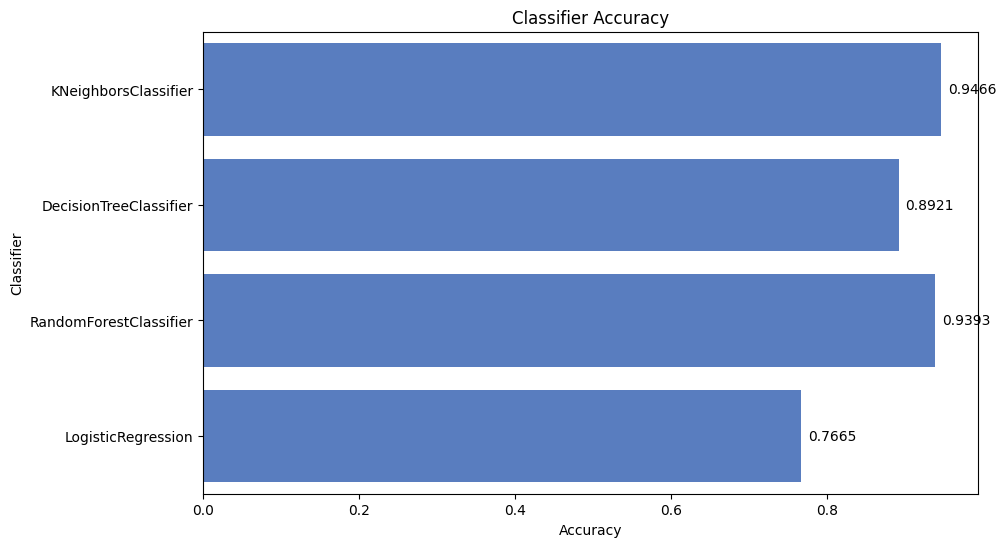

               Classifier  Accuracy
0    KNeighborsClassifier  0.946597
1  DecisionTreeClassifier  0.892147
2  RandomForestClassifier  0.939267
3      LogisticRegression  0.766492

Dataset name: Dữ liệu giảm chiều bằng SelectKBest
For dataset 5: Dữ liệu giảm chiều bằng SelectKBest


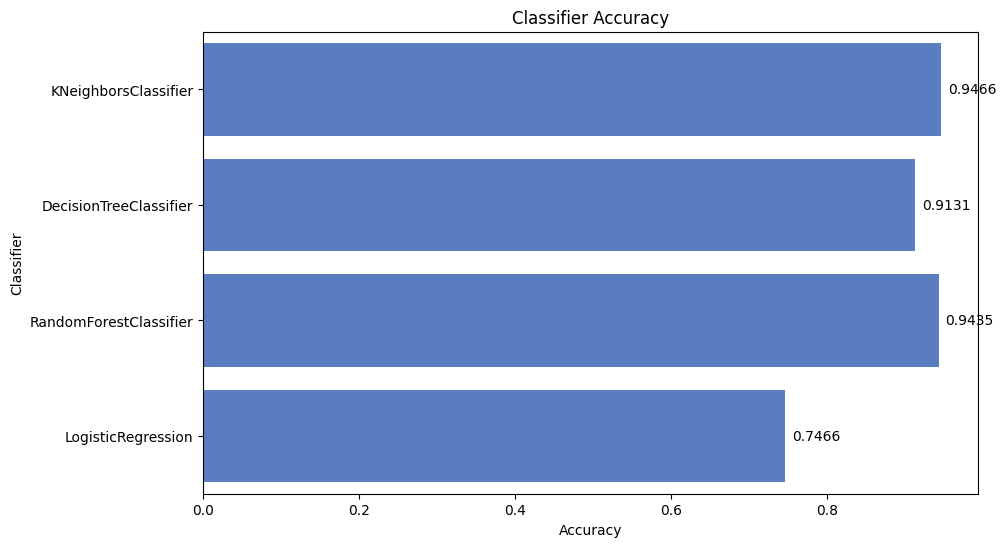

               Classifier  Accuracy
0    KNeighborsClassifier  0.946597
1  DecisionTreeClassifier  0.913089
2  RandomForestClassifier  0.943455
3      LogisticRegression  0.746597

Dataset name: Dữ liệu Feature Selection thủ công
For dataset 6: Dữ liệu Feature Selection thủ công


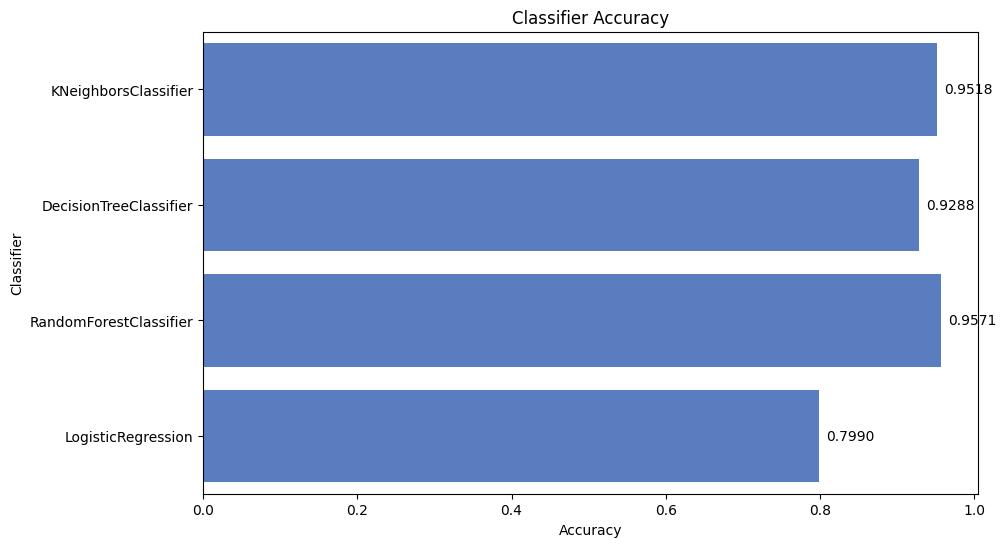

               Classifier  Accuracy
0    KNeighborsClassifier  0.951832
1  DecisionTreeClassifier  0.928796
2  RandomForestClassifier  0.957068
3      LogisticRegression  0.798953

Dataset name: Dữ liệu Feature Selection + PCA
For dataset 7: Dữ liệu Feature Selection + PCA


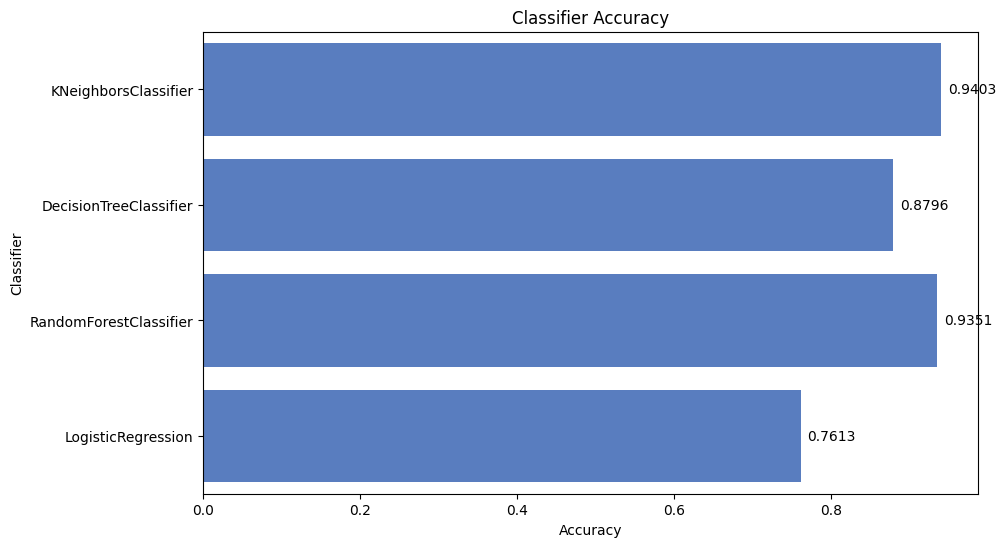

               Classifier  Accuracy
0    KNeighborsClassifier  0.940314
1  DecisionTreeClassifier  0.879581
2  RandomForestClassifier  0.935079
3      LogisticRegression  0.761257



In [451]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def preprocess(df):
    df1 = df.copy()
    y = df1.pop("BAD")
    return df1, y

def analysis(x_train, x_test, y_train, y_test):
    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(max_iter=1000)
    ]

    log_cols = ["Classifier", "Accuracy"]
    logs = []  
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(x_train, y_train)
        train_predictions = clf.predict(x_test)
        acc = accuracy_score(y_test, train_predictions)

        log_entry = {"Classifier": name, "Accuracy": acc}
        logs.append(log_entry)

    log = pd.DataFrame(logs)  

    plt.figure(figsize=(10, 6))
    plt.xlabel('Accuracy')
    plt.title('Classifier Accuracy')

    sns.set_color_codes("muted")
    barplots = sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
    for p in barplots.patches:
        barplots.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                           xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    plt.show()
    print(log)


datasets = [data_train_4, data_train_5, data_train_6, data_train_7]

for idx, dataset in enumerate(datasets):
    x, y = preprocess(dataset)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    print(f"For dataset {idx + 4}:",dataset.name)
    analysis(x_train, x_test, y_train, y_test)
    print()
